In [1]:
pip install pandas numpy scikit-learn factor_analyzer


     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.8 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 417.7 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42623 sha256=4dba9a7355a4ddeaa8c422affcfd404265de249a179210d89578771246843fe5
  Stored in directory: c:\users\sampreeth\appdata\local\pip\cache\wheels\fa\f7\53\a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer
Note: you may need to restart the kernel to use updated packages.


In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

In [3]:
# Function to auto-install and load packages
def install_and_load(packages):
    import subprocess
    import sys
    for package in packages:
        try:
            __import__(package)
        except ImportError:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])

In [4]:
# List of packages to install and load
packages = ['pandas', 'numpy', 'sklearn', 'factor_analyzer']
install_and_load(packages)

In [5]:
os.chdir('D:\\R Studio')

In [6]:
# Load the survey data
survey_df = pd.read_csv('Survey.csv')
print(survey_df.shape)  # Dimensions of the dataframe
print(survey_df.columns)  # Column names
print(survey_df.head())  # First few rows
print(survey_df.info())  # Structure of the dataframe

(70, 50)
Index(['City', 'Sex', 'Age', 'Occupation', 'Monthly Household Income',
       'Income', 'Planning to Buy a new house', 'Time Frame',
       'Reasons for buying a house', 'what type of House', 'Number of rooms',
       'Size of House', 'Budget', 'Finished/Semi Finished',
       'Influence Decision', 'Maintainance', 'EMI', '1.Proximity to city',
       '2.Proximity to schools', '3. Proximity to transport',
       '4. Proximity to work place', '5. Proximity to shopping',
       '1. Gym/Pool/Sports facility', '2. Parking space', '3.Power back-up',
       '4.Water supply', '5.Security', '1. Exterior look ', '2. Unit size',
       '3. Interior design and branded components',
       '4. Layout plan (Integrated etc.)', '5. View from apartment',
       '1. Price', '2. Booking amount', '3. Equated Monthly Instalment (EMI)',
       '4. Maintenance charges', '5. Availability of loan',
       '1. Builder reputation', '2. Appreciation potential',
       '3. Profile of neighbourhood', '4. Av

In [7]:
print(survey_df.isna().sum().sum())  # Total number of missing values

0


In [8]:
# Select the relevant subset of the dataframe
sur_int = survey_df.iloc[:, 19:46]
print(sur_int.shape)
print(sur_int.info())

(70, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   3. Proximity to transport                  70 non-null     int64  
 1   4. Proximity to work place                 70 non-null     int64  
 2   5. Proximity to shopping                   70 non-null     int64  
 3   1. Gym/Pool/Sports facility                70 non-null     int64  
 4   2. Parking space                           70 non-null     int64  
 5   3.Power back-up                            70 non-null     int64  
 6   4.Water supply                             70 non-null     int64  
 7   5.Security                                 70 non-null     int64  
 8   1. Exterior look                           70 non-null     int64  
 9   2. Unit size                               70 non-null     int64  
 10  3. Interior design 

In [11]:
# Perform PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(sur_int)


In [12]:
# Display the explained variance by each principal component
print(pca.explained_variance_ratio_)

[9.27394295e-01 7.25413292e-02 6.42132668e-05 1.32931069e-07
 1.98047817e-08]


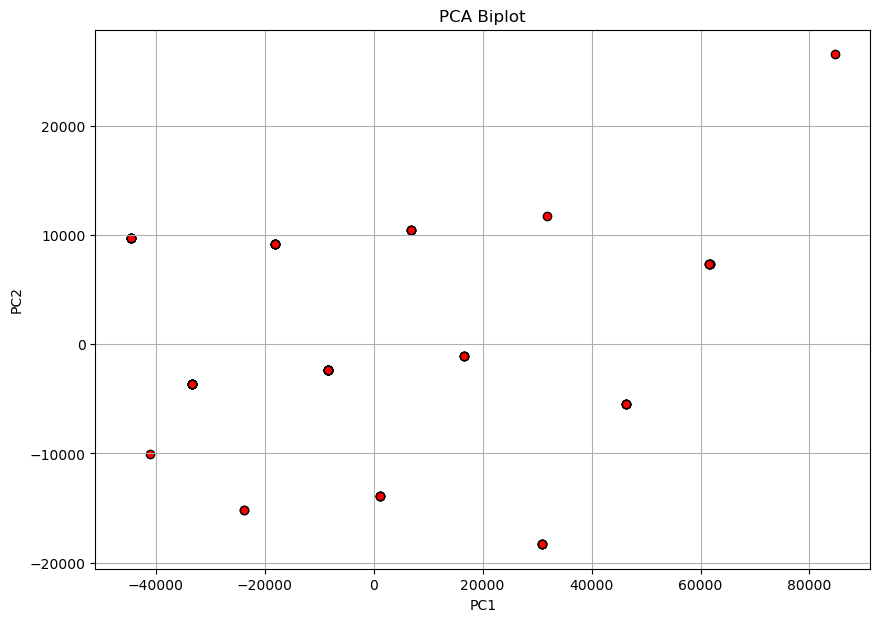

In [15]:
# Biplot for PCA
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], edgecolors='k', c='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot')
plt.grid(True)
plt.show()